# Investigation of trained transformers for time series

In [4]:
%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append("..")

In [6]:
from models import Autoformer
from utils.tools import dotdict
import torch

def obtain_autoformer(pred_len, dataset):
    assert dataset in ["ECL", "Exchange", "ETTm2"]
    assert pred_len in [96, 192, 336, 720]

    args = dotdict()
    args.pred_len = pred_len

    if dataset == "ECL":
        args.enc_in = 321
        args.dec_in = 321
        args.c_out = 321
    elif dataset == "Exchange":
        args.enc_in = 8
        args.dec_in = 8
        args.c_out = 8
    elif dataset == "ETTm2":
        args.enc_in = 1
        args.dec_in = 1
        args.c_out = 1

    if dataset == "ETTm2":
        args.label_len = 96
    else:
        args.label_len = 48

    args.target = 'OT'
    args.des = 'train'
    args.dropout = 0.05
    args.num_workers = 10
    args.gpu = 0
    args.lradj = 'type1'
    args.devices = '0'
    args.use_gpu = False
    args.use_multi_gpu = False
    args.freq = 'h'
    args.checkpoints = './checkpoints/'
    args.bucket_size = 4
    args.n_hashes = 4
    args.is_trainging = True
    args.data = 'custom'
    args.features = 'M'
    args.seq_len = 96
    # args.label_len = 48
    args.e_layers = 2
    args.d_layers = 1
    args.n_heads = 8
    args.factor = 1
    args.d_model = 512
    args.des = 'Exp'
    args.itr = 1
    args.d_ff = 2048
    args.moving_avg = 25
    args.factor = 3
    args.distil = True
    args.output_attention = False
    args.embed = 'timeF'

    autoformer_path = f"/Users/angelavansprang/Documents/PhD/transformers for time series/Autoformer/checkpoints/{dataset}_96_{pred_len}_Autoformer_{'ETTm2' if dataset == 'ETTm2' else 'custom'}_ft{'S' if dataset == 'ETTm2' else 'M'}_sl96_ll{'96' if dataset == 'ETTm2' else '48'}_pl{pred_len}_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/checkpoint.pth"

    autoformer = Autoformer.Model(args).float()
    autoformer.load_state_dict(torch.load(autoformer_path, map_location=torch.device('cpu')))

    autoformer.eval()

    return autoformer


In [7]:
from models import Informer
from utils.tools import dotdict
import torch

def obtain_informer(pred_len, dataset):
    assert dataset in ["ECL", "Exchange"]
    assert pred_len in [96, 192, 336, 720]

    device = torch.device('cpu')

    args = dotdict()
    args.pred_len = pred_len

    if dataset == "ECL":
        args.enc_in = 1
        args.dec_in = 1
        args.c_out = 1
    elif dataset == "Exchange":
        args.enc_in = 8
        args.dec_in = 8
        args.c_out = 8

    args.target = 'OT'
    args.des = 'train'
    args.dropout = 0.05
    args.num_workers = 10
    args.gpu = 0
    args.lradj = 'type1'
    args.devices = '0'
    args.use_gpu = False
    args.use_multi_gpu = False
    args.freq = 'h'
    args.checkpoints = './checkpoints/'
    args.bucket_size = 4
    args.n_hashes = 8
    args.is_trainging = True
    args.data = 'custom'
    args.features = 'S'
    args.seq_len = 96
    args.label_len = 48
    args.e_layers = 2
    args.d_layers = 1
    args.n_heads = 8
    args.factor = 1

    args.d_model = 512
    args.des = 'Exp'
    args.itr = 1
    args.d_ff = 2048
    args.moving_avg = 25
    args.factor = 3
    args.distil = True
    args.output_attention = False
    args.embed = 'timeF'

    informer_path = f"/Users/angelavansprang/Documents/PhD/transformers for time series/Autoformer/checkpoints/{dataset}_96_{pred_len}_Informer_custom_ft{'S' if dataset == 'ECL' else ('M' if dataset == 'Exchange' else '')}_sl96_ll48_pl{pred_len}_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/checkpoint.pth"

    informer = Informer.Model(args).float()
    informer.load_state_dict(torch.load(informer_path, map_location=device))

    informer.eval()

    return informer

In [8]:
from models import FEDformer
from utils.tools import dotdict
import torch
import random
import numpy as np

# SETTING THE SEED TO THE TRAINING SEED IS IMPORTANT


def obtain_FEDformer(pred_len, dataset):
    assert dataset in ["ECL", "Exchange"]
    assert pred_len in [96, 192, 336, 720]

    fix_seed = 2021
    random.seed(fix_seed)
    torch.manual_seed(fix_seed)
    np.random.seed(fix_seed)

    args = dotdict()

    args.L = 3
    args.activation = 'gelu'
    args.base = 'legendre'
    args.batch_size = 32,
    args.bucket_size = 4,

    if dataset == "ECL":
        args.enc_in = 321
        args.dec_in = 321
        args.c_out = 321
    elif dataset == "Exchange":
        args.enc_in = 8
        args.dec_in = 8
        args.c_out = 8

    # args.checkpoints = "./checkpoints/"
    args.cross_activation = 'tanh'
    args.d_ff = 2048   
    args.d_layers = 1    
    args.d_model = 512
    args.data = 'custom'
    args.data_path = 'electricity.csv'    
    args.des = 'Exp'
    # args.devices = '0,1,2,3'
    args.distil = True
    args.do_predict = False
    args.dropout = 0.05
    args.e_layers = 2    
    args.embed = 'timeF'
    args.factor = 3
    args.features = 'M'
    args.freq = 'h'
    # args.gpu = 0
    args.individual = False
    args.is_training = 0
    args.itr = 1
    args.label_len = 48
    # args.learning_rate = 0.0001
    # args.loss = "mse"
    args.lradj = 'type1'    
    args.mode_select = 'random'
    args.model = 'FEDformer'
    # args.model_id = 'ECL_96_720'
    args.modes = 64
    args.moving_avg = 25
    args.n_hashes = 4
    args.n_heads = 8
    # args.num_workers = 10
    args.output_attention = False       
    # args.patience = 3
    # args.root_path = './dataset/electricity/'
    args.seq_len = 96    
    args.pred_len = pred_len
    args.target = 'OT'
    # args.train_epochs = 10
    args.use_amp = False
    args.use_gpu = False
    args.use_multi_gpu = False
    args.version = "Fourier"

    FEDformer_path = f"/Users/angelavansprang/Documents/PhD/transformers for time series/Autoformer/checkpoints/{dataset}_96_{pred_len}_FEDformer_custom_ftM_sl96_ll48_pl{pred_len}_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/checkpoint.pth"
    fedformer = FEDformer.Model(args).float()
    fedformer.load_state_dict(torch.load(FEDformer_path, map_location=torch.device('cpu')))

    fedformer.eval()

    return fedformer

In [9]:
from models import Linear
from utils.tools import dotdict
import torch

def obtain_linear(pred_len, dataset):
    assert dataset in ["ECL", "Exchange"]
    assert pred_len in [96, 192, 336, 720]

    args = dotdict()
    args.pred_len = pred_len

    args.target = 'OT'
    args.des = 'train'
    args.dropout = 0.05
    args.num_workers = 10
    args.gpu = 0
    args.lradj = 'type1'
    args.devices = '0'
    args.use_gpu = False
    args.use_multi_gpu = False
    args.freq = 'h'
    args.checkpoints = './checkpoints/'
    args.bucket_size = 4
    args.n_hashes = 8
    args.is_trainging = True
    args.data = 'custom'
    args.features = 'M'
    args.seq_len = 336
    args.label_len = 48
    args.factor = 1


    args.d_model = 512
    args.des = 'Exp'
    args.itr = 1
    args.d_ff = 2048
    args.moving_avg = 25
    args.factor = 1
    args.distil = True
    args.output_attention = False
    args.embed = 'timeF'

    linear_path = f"/Users/angelavansprang/Documents/PhD/transformers for time series/Autoformer/checkpoints/{dataset}_{args.seq_len}_{pred_len}_Linear_custom_ftM_sl{args.seq_len}_ll48_pl{pred_len}_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth"

    linear = Linear.Model(args).float()
    linear.load_state_dict(torch.load(linear_path, map_location=torch.device('cpu')))

    linear.eval()

    return linear

In [10]:
# seq_len = 96
# label_len = 48

# def obtain_plot_predictions(pred_len, data_set, data_loader, autoformer, informer, fedformer = None, item = 0, time_series_id = 0, alpha_gt = 1, alpha_pred = 0.5):
#     with torch.no_grad():
#         # if data_set == "ECL":
#         #     batch_size = 1
#         # elif data_set == "Exchange":
#         #     batch_size = 8
#         for i, (seq_x, seq_y, seq_x_mark, seq_y_mark) in enumerate(data_loader):
#             if i == item:
#                 # seq_x is batch_size x seq_len x N_timeseries
#                 # seq_y is batch_size x label_len x N_timeseries
#                 # seq_x_mark is batch_size x seq_len X N_timefeatures
#                 # seq_y_mark is batch_size x (label_len+pred_len) X N_timefeatures

#                 outputs_autoformer = autoformer(seq_x.float(), seq_x_mark.float(), seq_y.float(), seq_y_mark.float())

#                 if data_set == "ECL":
#                     outputs_informer = informer(seq_x[0,:,0].reshape((1,seq_len,1)).float(), seq_x_mark.float(), seq_y[0,:,0].reshape((1,label_len+pred_len,1)).float(), seq_y_mark.float())
#                 elif data_set == "Exchange":
#                     outputs_informer = informer(seq_x.float(), seq_x_mark.float(), seq_y.float(), seq_y_mark.float())

#                 if fedformer is not None:
#                     outputs_fedformer = fedformer(seq_x.float(), seq_x_mark.float(), seq_y.float(), seq_y_mark.float())

#                 plt.plot(range(seq_len), seq_x[0,:,time_series_id], label="input sequence")
#                 plt.plot(range(seq_len-label_len, seq_len+pred_len), seq_y[0,:,time_series_id], label="ground truth prediction", color="black", alpha=alpha_gt)
#                 plt.plot(range(seq_len, seq_len+pred_len), outputs_autoformer[0,:,time_series_id], label="autoformer", alpha=alpha_pred)
#                 plt.plot(range(seq_len, seq_len+pred_len), outputs_informer[0,:,time_series_id], label="informer", alpha=alpha_pred)
#                 if fedformer is not None:
#                     plt.plot(range(seq_len, seq_len+pred_len), outputs_fedformer[0,:,time_series_id], label="fedformer", alpha=alpha_pred)
#                 plt.legend()
#                 plt.xlabel("Data points")
#                 plt.ylabel("Scaled time series")
#                 plt.suptitle(f"{'Energy consumption' if data_set=='ECL' else (f'Daily exchange rate (country {time_series_id})' if data_set=='Exchange' else '')} forecasting with prediction length {pred_len}")
#                 plt.show()

#                 break

In [28]:
seq_len = 96
label_len = 48

def obtain_plot_predictions(pred_len, data_set, data_loader_noninformers, data_loader_informer, autoformer, informer, fedformer = None, item = 0, time_series_id =0, alpha_gt = 1, alpha_pred = 0.5):
    with torch.no_grad():

        for i, (seq_x, seq_y, seq_x_mark, seq_y_mark) in enumerate(data_loader_noninformers):
            if i == item:
                # seq_x is batch_size x seq_len x N_timeseries
                # seq_y is batch_size x label_len x N_timeseries
                # seq_x_mark is batch_size x seq_len X N_timefeatures
                # seq_y_mark is batch_size x (label_len+pred_len) X N_timefeatures

                # decoder input
                dec_inp = torch.zeros_like(seq_y[:, -pred_len:, :]).float()
                dec_inp = torch.cat([seq_y[:, :label_len, :], dec_inp], dim=1).float()

                # gt = np.concatenate((seq_x[0, :, 0], seq_y[0, -pred_len:, 0]), axis=0)
                gt = np.concatenate((seq_x[0, :, -1], seq_y[0, -pred_len:, -1]), axis=0)

                outputs_autoformer = autoformer(seq_x.float(), seq_x_mark.float(), dec_inp, seq_y_mark.float())

                if fedformer is not None:
                    outputs_fedformer = fedformer(seq_x.float(), seq_x_mark.float(), dec_inp, seq_y_mark.float())
                    pd_fedformer = np.concatenate((seq_x[0, :, -1], outputs_fedformer[0, -pred_len:, -1]), axis=0)
                    # pd_fedformer = np.concatenate((seq_x[0, :, 0], outputs_fedformer[0, -pred_len:, 0]), axis=0)

                pd_autoformer = np.concatenate((seq_x[0, :, -1], outputs_autoformer[0, -pred_len:, -1]), axis=0)
                # pd_autoformer = np.concatenate((seq_x[0, :, 0], outputs_autoformer[0, -pred_len:, 0]), axis=0)

                plt.plot(gt, label="ground truth", color="black", alpha=alpha_gt)
                plt.plot(pd_autoformer, label="autoformer", alpha=alpha_pred)
                if fedformer is not None:
                    plt.plot(pd_fedformer, label="fedformer", alpha=alpha_pred)

                if data_set == "Exchange":
                    outputs_informer = informer(seq_x.float(), seq_x_mark.float(), dec_inp, seq_y_mark.float())
                    pd_informer = np.concatenate((seq_x[0, :, -1], outputs_informer[0, -pred_len:, -1]), axis=0)
                    # pd_informer = np.concatenate((seq_x[0, :, 0], outputs_informer[0, -pred_len:, 0]), axis=0)
                    plt.plot(pd_informer, label="informer", alpha=alpha_pred)
                    plt.legend()
                    plt.xlabel("Data points")
                    plt.ylabel("Scaled time series")
                    plt.suptitle(f"{'Energy consumption' if data_set=='ECL' else (f'Daily exchange rate (country {time_series_id})' if data_set=='Exchange' else '')} forecasting with prediction length {pred_len}")
                    plt.show()

                break

        if data_set == "ECL":

            for i, (seq_x, seq_y, seq_x_mark, seq_y_mark) in enumerate(data_loader_informer):
                if i == item:
                    # decoder input
                    dec_inp = torch.zeros_like(seq_y[:, -pred_len:, :]).float()
                    dec_inp = torch.cat([seq_y[:, :label_len, :], dec_inp], dim=1).float()

                    gt = np.concatenate((seq_x[0, :, -1], seq_y[0, -pred_len:, -1]), axis=0)
                    # gt = np.concatenate((seq_x[0, :, 0], seq_y[0, -pred_len:, 0]), axis=0)

                    outputs_informer = informer(seq_x.float(), seq_x_mark.float(), dec_inp, seq_y_mark.float())
                    pd_informer = np.concatenate((seq_x[0, :, -1], outputs_informer[0, -pred_len:, -1]), axis=0)
                    # pd_informer = np.concatenate((seq_x[0, :, 0], outputs_informer[0, -pred_len:, 0]), axis=0)
                    plt.plot(pd_informer, label="informer", alpha=alpha_pred)
                    plt.legend()
                    plt.xlabel("Data points")
                    plt.ylabel("Scaled time series")
                    plt.suptitle(f"{'Energy consumption' if data_set=='ECL' else (f'Daily exchange rate (country {time_series_id})' if data_set=='Exchange' else '')} forecasting with prediction length {pred_len}")
                    plt.show()

                    break

In [12]:
from data_provider.data_loader import Dataset_Custom
from torch.utils.data import DataLoader

def obtain_data_loader_electricity(pred_len, seq_len = 96, model="non-informer", split="test"): 
    label_len = 48

    if model == "informer":
        features = "S"
    else:
        features = "M"

    data_set_electricity = Dataset_Custom(
        root_path = "/Users/angelavansprang/Documents/PhD/transformers for time series/Autoformer/dataset/electricity/",
        data_path = "electricity.csv",
        flag=split, # flag must be train in order for the linear dataloader to contain the same data
        size=[seq_len, label_len, pred_len], # seq_len, label_len, pred_len
        features=features,
        target="OT", #default
        timeenc=1,
        freq="h"
    )

    data_loader_electricity = DataLoader(
        data_set_electricity,
        batch_size=1,
        shuffle=False,
        num_workers=0,
        drop_last=False
    )
    return data_loader_electricity

In [13]:
from data_provider.data_loader import Dataset_Custom
from torch.utils.data import DataLoader

def obtain_data_loader_exchange(pred_len, seq_len = 96, model="non-informer", split="test"): 
    label_len = 48

    # if model == "informer":
    #     features = "S"
    # else:
    #     features = "M"

    data_set_exchange = Dataset_Custom(
        root_path = "/Users/angelavansprang/Documents/PhD/transformers for time series/Autoformer/dataset/exchange_rate/",
        data_path = "exchange_rate.csv",
        flag=split,
        size=[seq_len, label_len, pred_len], # seq_len, label_len, pred_len
        features="M",
        target="OT", #default
        timeenc=1,
        freq="h"
    )

    data_loader_exchange = DataLoader(
        data_set_exchange,
        batch_size=1,
        shuffle=False,
        num_workers=0,
        drop_last=False
    )
    return data_loader_exchange

In [14]:
from data_provider.data_loader import Dataset_ETT_minute
from torch.utils.data import DataLoader

def obtain_data_loader_ettm2(pred_len, seq_len = 96): 
    label_len = 48

    data_set_ettm2 = Dataset_ETT_minute(
        root_path = "/Users/angelavansprang/Documents/PhD/transformers for time series/Autoformer/dataset/ETT-small/",
        data_path = "ETTm2.csv",
        flag="train",
        size=[seq_len, label_len, pred_len], # seq_len, label_len, pred_len
    )

    data_loader_exchange = DataLoader(
        data_set_ettm2,
        batch_size=32,
        shuffle=False,
        num_workers=0,
        drop_last=False
    )
    return data_loader_exchange

In [15]:
autoformer_720 = obtain_autoformer(pred_len=720, dataset="ETTm2")

data_loader_autoformer_720 = obtain_data_loader_ettm2(pred_len=720)

RuntimeError: Error(s) in loading state_dict for Model:
	size mismatch for enc_embedding.temporal_embedding.embed.weight: copying a param with shape torch.Size([512, 5]) from checkpoint, the shape in current model is torch.Size([512, 4]).
	size mismatch for dec_embedding.temporal_embedding.embed.weight: copying a param with shape torch.Size([512, 5]) from checkpoint, the shape in current model is torch.Size([512, 4]).

In [16]:
seq_len = 96
label_len = 48

def obtain_plot_predictions_v2(pred_len, data_set, models, descriptions, item = 0, time_series_id = 0, alpha_gt = 1, alpha_pred = 0.5):
    # i.e. models is list of models to use for forecasting, descriptions is list of strings of their names
    # valid strings in descriptions: ["autoformer", "informer", "FEDformer", "linear"]
    # this method obtains dataloaders itself, so that takes a bit longer
    # NOTE: WE OBTAIN THE TRAIN DATASETS, BECAUSE OTHERWISE THE LINEAR MODEL DOES NOT USE THE SAME DATA

    if "linear" in descriptions:
        split = "train"
    else:
        split = "test"

    if data_set == "ECL":
        data_loader = obtain_data_loader_electricity(pred_len=pred_len, split=split)
    elif data_set == "Exchange":
        data_loader = obtain_data_loader_exchange(pred_len=pred_len, split=split)

    if "linear" in descriptions:
        if data_set == "ECL":
            data_loader_linear = obtain_data_loader_electricity(pred_len=pred_len, seq_len=336, split=split)
        elif data_set == "Exchange":
            data_loader_linear = obtain_data_loader_exchange(pred_len=pred_len, seq_len=336, split=split)

    if "informer" in descriptions:
        if data_set == "ECL":
            data_loader_informer = obtain_data_loader_electricity(pred_len=pred_len, model="informer", split=split)

    with torch.no_grad():
        # if data_set == "ECL":
        #     batch_size = 1
        # elif data_set == "Exchange":
        #     batch_size = 8
        seq_len = 96
        for i, (seq_x, seq_y, seq_x_mark, seq_y_mark) in enumerate(data_loader):
            if i == item:
                # seq_x is batch_size x seq_len x N_timeseries
                # seq_y is batch_size x label_len x N_timeseries
                # seq_x_mark is batch_size x seq_len X N_timefeatures
                # seq_y_mark is batch_size x (label_len+pred_len) X N_timefeatures

                # decoder input
                dec_inp = torch.zeros_like(seq_y[:, -pred_len:, :]).float()
                dec_inp = torch.cat([seq_y[:, :label_len, :], dec_inp], dim=1).float()

                gt = np.concatenate((seq_x[0, :, -1], seq_y[0, -pred_len:, -1]), axis=0)

                for ii, model in enumerate(models):
                    desc_i = descriptions[ii]
                    if desc_i == "informer" and data_set == "ECL":
                        pass
                    elif desc_i == "linear":
                        pass
                    else:
                        output = model(seq_x.float(), seq_x_mark.float(), dec_inp, seq_y_mark.float())
                        pd = np.concatenate((seq_x[0, :, -1], output[0, -pred_len:, -1]), axis=0)
                        plt.plot(pd, label=desc_i, alpha=alpha_pred)
                        # outputs.append(pd)

                # if len(outputs) != 0:
                #     for ii in range(len(outputs)):
                #         plt.plot(outputs[ii], label=descriptions[ii], alpha=alpha_pred)

                plt.xlabel("Data points")
                plt.ylabel("Scaled time series")
                plt.suptitle(f"{'Energy consumption' if data_set=='ECL' else (f'Daily exchange rate (country {time_series_id})' if data_set=='Exchange' else '')} forecasting with prediction length {pred_len} ({split} set)")

        if "informer" in descriptions and data_set == "ECL":
            for i, (seq_x, seq_y, seq_x_mark, seq_y_mark) in enumerate(data_loader_informer):
                if i == item:
                    informer = models[descriptions.index("informer")]

                    # decoder input
                    dec_inp = torch.zeros_like(seq_y[:, -pred_len:, :]).float()
                    dec_inp = torch.cat([seq_y[:, :label_len, :], dec_inp], dim=1).float()

                    gt = np.concatenate((seq_x[0, :, -1], seq_y[0, -pred_len:, -1]), axis=0)

                    outputs_informer = informer(seq_x.float(), seq_x_mark.float(), dec_inp, seq_y_mark.float())
                    pd_informer = np.concatenate((seq_x[0, :, -1], outputs_informer[0, -pred_len:, -1]), axis=0)

                    plt.plot(pd_informer, label="informer", alpha=alpha_pred)

                break

        
        if "linear" in descriptions:
            seq_len = 336
            other_seq_len = 96
            for i, (seq_x, seq_y, seq_x_mark, seq_y_mark) in enumerate(data_loader_linear):
                if i == item:
                    model = models[descriptions.index("linear")]
                    output = model(seq_x.float())

                    pd_linear = np.concatenate((seq_x[0, :, -1], output[0, :pred_len+other_seq_len-seq_len, -1]), axis=0)

                    # plt.plot(range(seq_len, seq_len+pred_len-(336-96)), outputs[i][0,:,time_series_id], label=descriptions[i])
                    plt.plot(pd_linear, label='linear', alpha=alpha_pred)

                break

        
        plt.plot(gt, label="input sequence", color="black", alpha=alpha_gt)
        plt.legend()
        plt.show()


## Electricity dataset

In [17]:
path = "/Users/angelavansprang/Documents/PhD/transformers for time series/Autoformer/dataset/electricity/electricity.csv"
df_raw = pd.read_csv(path)

df_raw

,date,0,1,2,3,4,5,6,7,8,...,311,312,313,314,315,316,317,318,319,OT
0,2016-07-01 02:00:00,14.0,69.0,234.0,415.0,215.0,1056.0,29.0,840.0,226.0,...,676.0,372.0,80100.0,4719.0,5002.0,48.0,38.0,1558.0,182.0,2162.0
1,2016-07-01 03:00:00,18.0,92.0,312.0,556.0,292.0,1363.0,29.0,1102.0,271.0,...,805.0,452.0,95200.0,4643.0,6617.0,65.0,47.0,2177.0,253.0,2835.0
2,2016-07-01 04:00:00,21.0,96.0,312.0,560.0,272.0,1240.0,29.0,1025.0,270.0,...,817.0,430.0,96600.0,4285.0,6571.0,64.0,43.0,2193.0,218.0,2764.0
3,2016-07-01 05:00:00,20.0,92.0,312.0,443.0,213.0,845.0,24.0,833.0,179.0,...,801.0,291.0,94500.0,4222.0,6365.0,65.0,39.0,1315.0,195.0,2735.0
4,2016-07-01 06:00:00,22.0,91.0,312.0,346.0,190.0,647.0,16.0,733.0,186.0,...,807.0,279.0,91300.0,4116.0,6298.0,75.0,40.0,1378.0,191.0,2721.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,11.0,116.0,8.0,844.0,384.0,1590.0,51.0,1412.0,407.0,...,1897.0,1589.0,166500.0,9917.0,10412.0,324.0,21.0,1870.0,162.0,2773.0
26300,2019-07-01 22:00:00,11.0,103.0,8.0,749.0,371.0,1366.0,47.0,1265.0,369.0,...,1374.0,1336.0,158800.0,6812.0,8956.0,302.0,20.0,1506.0,438.0,2755.0
26301,2019-07-01 23:00:00,12.0,93.0,8.0,650.0,346.0,1282.0,48.0,1079.0,308.0,...,938.0,1311.0,154300.0,6602.0,5910.0,302.0,18.0,1864.0,621.0,2650.0
26302,2019-07-02 00:00:00,10.0,92.0,8.0,646.0,349.0,1261.0,48.0,1009.0,288.0,...,833.0,1227.0,141900.0,6546.0,5502.0,259.0,33.0,2623.0,783.0,2719.0


In [18]:
%matplotlib inline

Text(0.5, 0.98, 'Hourly electricity consumption of customer 0')

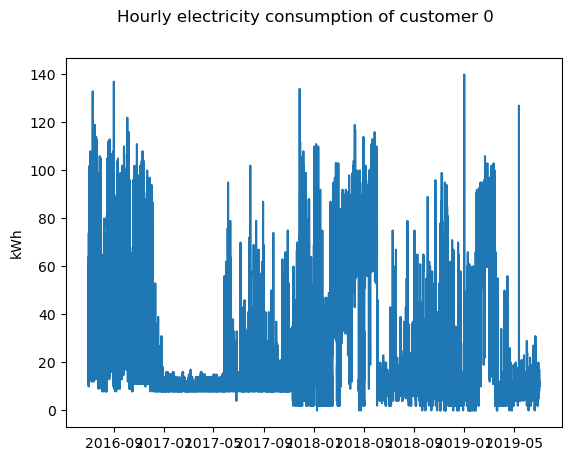

In [19]:
plt.plot(pd.to_datetime(df_raw['date'].values), df_raw["0"])
plt.rcParams["figure.figsize"] = (10,3)
plt.ylabel("kWh")
plt.suptitle("Hourly electricity consumption of customer 0")


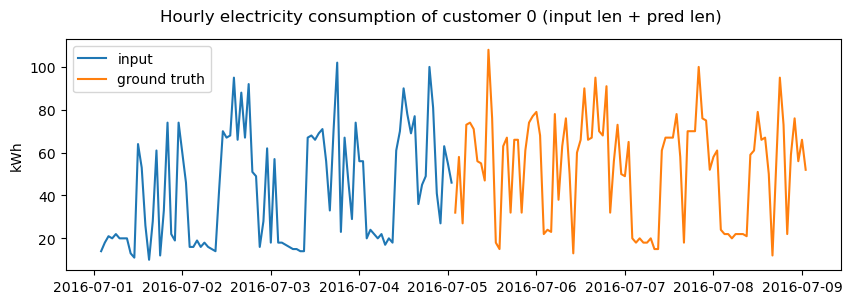

In [20]:
plt.plot(pd.to_datetime(df_raw['date'].values)[:96], df_raw["0"][:96], label="input")
plt.plot(pd.to_datetime(df_raw['date'].values)[96:192], df_raw["0"][96:192], label="ground truth")
plt.rcParams["figure.figsize"] = (10,3)
plt.ylabel("kWh")
plt.suptitle("Hourly electricity consumption of customer 0 (input len + pred len)")
plt.legend()

In [21]:
# obtain scaler for the data, as used by the dataloader

from sklearn.preprocessing import StandardScaler

seq_len = 96
set_type = 0 # {'train': 0, 'val': 1, 'test': 2}

border1s = [0, 12 * 30 * 24 - seq_len, 12 * 30 * 24 + 4 * 30 * 24 - seq_len]
border2s = [12 * 30 * 24, 12 * 30 * 24 + 4 * 30 * 24, 12 * 30 * 24 + 8 * 30 * 24]
border1 = border1s[set_type]
border2 = border2s[set_type]

cols_data = df_raw.columns[1:]
df_data = df_raw[cols_data]
train_data = df_data[border1s[0]:border2s[0]]
print(train_data.shape)

scaler = StandardScaler()
scaler.fit(train_data.values)
data = scaler.transform(df_data.values)

(8640, 321)


Text(0.5, 0.98, 'Hourly electricity consumption of customer 0')

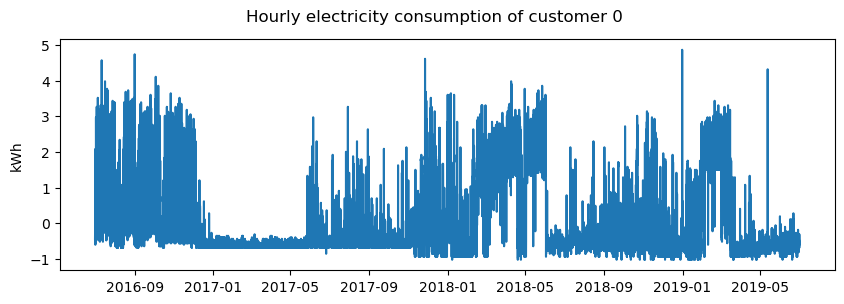

In [22]:
plt.plot(pd.to_datetime(df_raw['date'].values), data[:,0])
plt.rcParams["figure.figsize"] = (10,3)
plt.ylabel("kWh")
plt.suptitle("Hourly electricity consumption of customer 0")

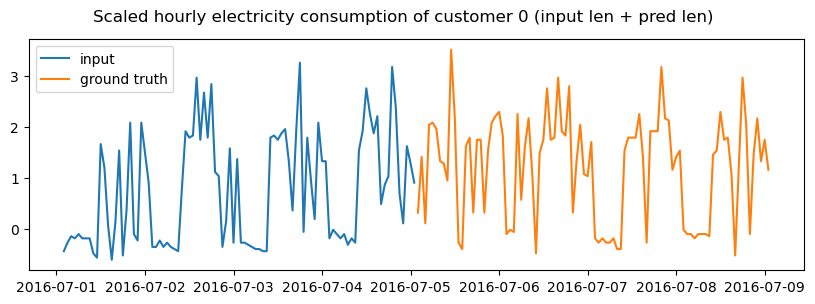

In [23]:
plt.plot(pd.to_datetime(df_raw['date'].values)[:96], data[:96,0], label="input")
plt.plot(pd.to_datetime(df_raw['date'].values)[96:192], data[96:192,0], label="ground truth")
plt.rcParams["figure.figsize"] = (10,3)
plt.suptitle("Scaled hourly electricity consumption of customer 0 (input len + pred len)")
plt.legend()

In [24]:
# seq_len = input sequence length, label_len = start token length, pred_len = prediction sequence length
seq_len = 96
label_len = 48
pred_len = 96

import sys
sys.path.append("..")

from data_provider.data_loader import Dataset_Pred, Dataset_Custom
from torch.utils.data import DataLoader

data_set_electricity = Dataset_Custom(
    root_path = "/Users/angelavansprang/Documents/PhD/transformers for time series/Autoformer/dataset/electricity/",
    data_path = "electricity.csv",
    flag="test",
    size=[seq_len, label_len, pred_len], # seq_len, label_len, pred_len
    features="M",
    target="OT", #default
    timeenc=1,
    freq="h"
)

data_loader_electricity = DataLoader(
    data_set_electricity,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    drop_last=False
)

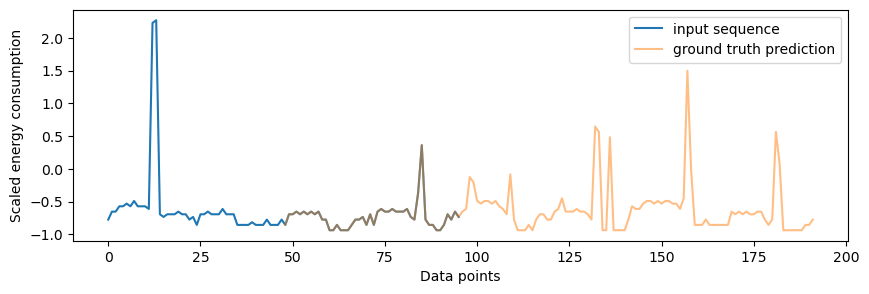

torch.Size([1, 96, 321])
torch.Size([1, 144, 321])
torch.Size([1, 96, 4])
torch.Size([1, 144, 4])


In [25]:
from utils.timefeatures import time_features

for seq_x, seq_y, seq_x_mark, seq_y_mark in data_loader_electricity:
    # seq_x is batch_size x seq_len x N_timeseries
    # seq_y is batch_size x label_len x N_timeseries
    # seq_x_mark is batch_size x seq_len X N_timefeatures
    # seq_y_mark is batch_size x (label_len+pred_len) X N_timefeatures
    plt.plot(range(seq_len), seq_x[0,:,0], label="input sequence")
    plt.plot(range(seq_len-label_len, seq_len+pred_len), seq_y[0,:,0], alpha=0.5, label="ground truth prediction")
    plt.legend()
    plt.xlabel("Data points")
    plt.ylabel("Scaled energy consumption")
    plt.show()
    print(seq_x.shape)
    print(seq_y.shape)
    print(seq_x_mark.shape)
    print(seq_y_mark.shape)
    break

In [29]:
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

autoformer_96 = obtain_autoformer(pred_len=96, dataset="ECL")
autoformer_192 = obtain_autoformer(pred_len=192, dataset="ECL")
autoformer_336 = obtain_autoformer(pred_len=336, dataset="ECL")
autoformer_720 = obtain_autoformer(pred_len=720, dataset="ECL")

informer_96 = obtain_informer(pred_len=96, dataset="ECL")
informer_192 = obtain_informer(pred_len=192, dataset="ECL")
informer_336 = obtain_informer(pred_len=336, dataset="ECL")
informer_720 = obtain_informer(pred_len=720, dataset="ECL")

FEDformer_96 = obtain_FEDformer(pred_len=96, dataset="ECL")
FEDformer_192 = obtain_FEDformer(pred_len=192, dataset="ECL")
FEDformer_336 = obtain_FEDformer(pred_len=336, dataset="ECL")
FEDformer_720 = obtain_FEDformer(pred_len=720, dataset="ECL")

linear_96 = obtain_linear(pred_len=96, dataset="ECL")
linear_192 = obtain_linear(pred_len=192, dataset="ECL")
linear_336 = obtain_linear(pred_len=336, dataset="ECL")
linear_720 = obtain_linear(pred_len=720, dataset="ECL")

data_loader_electricity_96 = obtain_data_loader_electricity(pred_len=96)
data_loader_electricity_192 = obtain_data_loader_electricity(pred_len=192)
data_loader_electricity_336 = obtain_data_loader_electricity(pred_len=336)
data_loader_electricity_720 = obtain_data_loader_electricity(pred_len=720)

data_loader_electricity_96_informer = obtain_data_loader_electricity(pred_len=96, model="informer")
data_loader_electricity_192_informer = obtain_data_loader_electricity(pred_len=192, model="informer")
data_loader_electricity_336_informer = obtain_data_loader_electricity(pred_len=336, model="informer")
data_loader_electricity_720_informer = obtain_data_loader_electricity(pred_len=720, model="informer")

fourier enhanced block used!
modes=64, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
fourier enhanced block used!
modes=64, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]
 fourier enhanced cross attention used!
modes_q=64, index_q=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 71]
modes_kv=48, index_kv=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 

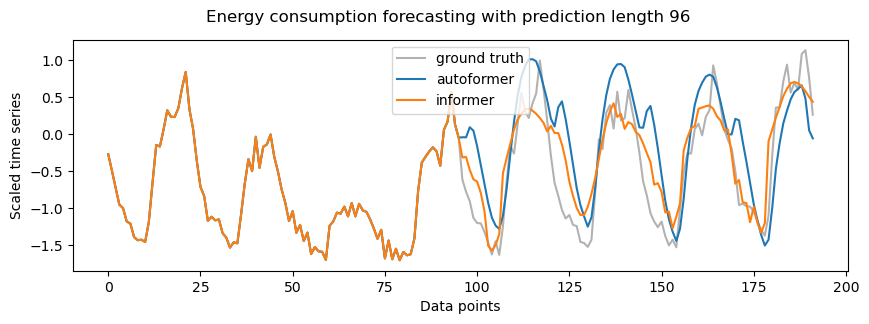

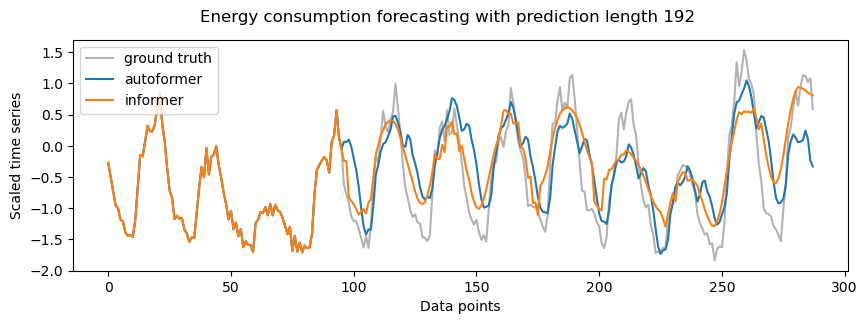

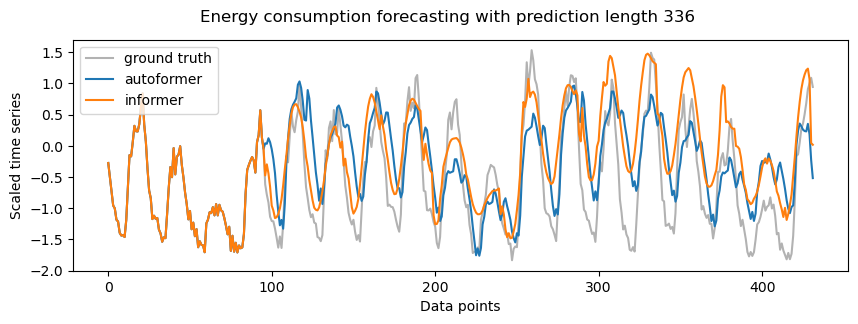

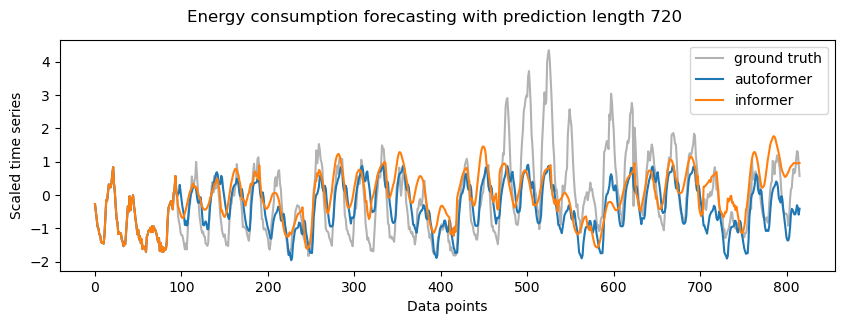

In [30]:
obtain_plot_predictions(pred_len=96, data_set="ECL", data_loader_noninformers=data_loader_electricity_96, data_loader_informer=data_loader_electricity_96_informer, autoformer=autoformer_96, informer=informer_96, alpha_gt=0.3, alpha_pred=1)
obtain_plot_predictions(pred_len=192, data_set="ECL", data_loader_noninformers=data_loader_electricity_192, data_loader_informer=data_loader_electricity_192_informer, autoformer=autoformer_192, informer=informer_192, alpha_gt=0.3, alpha_pred=1)
obtain_plot_predictions(pred_len=336, data_set="ECL", data_loader_noninformers=data_loader_electricity_336, data_loader_informer=data_loader_electricity_336_informer, autoformer=autoformer_336, informer=informer_336, alpha_gt=0.3, alpha_pred=1)
obtain_plot_predictions(pred_len=720, data_set="ECL", data_loader_noninformers=data_loader_electricity_720, data_loader_informer=data_loader_electricity_720_informer, autoformer=autoformer_720, informer=informer_720, alpha_gt=0.3, alpha_pred=1)

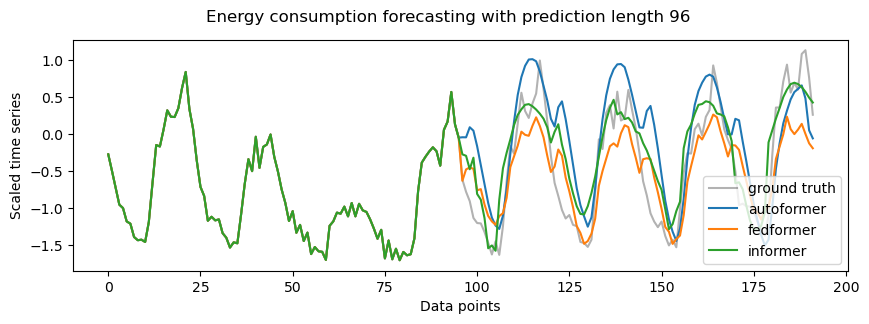

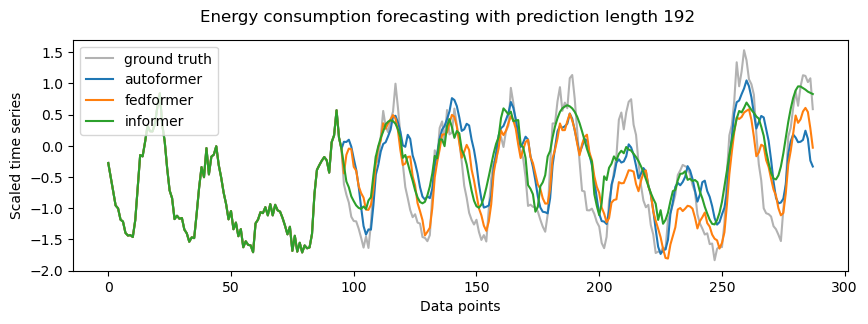

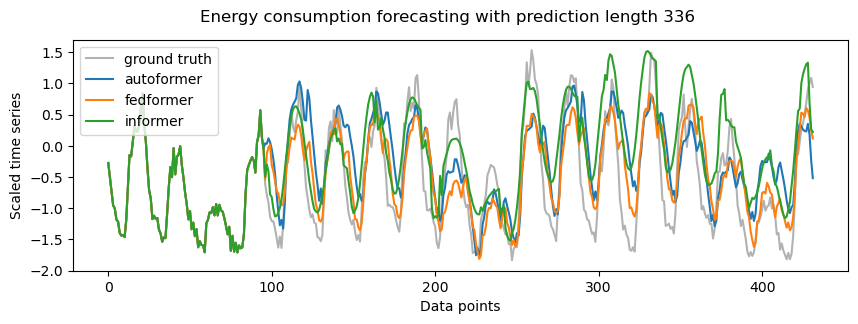

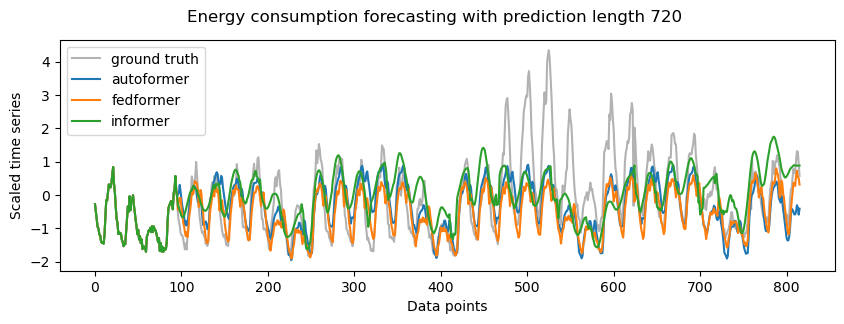

In [31]:
# obtain a plot with only the transformer models
obtain_plot_predictions(pred_len=96, data_set="ECL", data_loader_noninformers=data_loader_electricity_96, data_loader_informer=data_loader_electricity_96_informer, autoformer=autoformer_96, informer=informer_96, fedformer=FEDformer_96, alpha_gt=0.3, alpha_pred=1)
obtain_plot_predictions(pred_len=192, data_set="ECL", data_loader_noninformers=data_loader_electricity_192, data_loader_informer=data_loader_electricity_192_informer, autoformer=autoformer_192, informer=informer_192, fedformer=FEDformer_192, alpha_gt=0.3, alpha_pred=1)
obtain_plot_predictions(pred_len=336, data_set="ECL", data_loader_noninformers=data_loader_electricity_336, data_loader_informer=data_loader_electricity_336_informer, autoformer=autoformer_336, informer=informer_336, fedformer=FEDformer_336, alpha_gt=0.3, alpha_pred=1)
obtain_plot_predictions(pred_len=720, data_set="ECL", data_loader_noninformers=data_loader_electricity_720, data_loader_informer=data_loader_electricity_720_informer, autoformer=autoformer_720, informer=informer_720, fedformer=FEDformer_720, alpha_gt=0.3, alpha_pred=1)

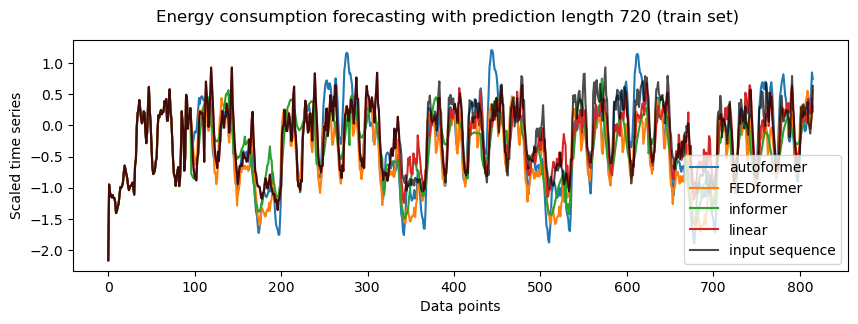

In [32]:
# Obtain a plot with a linear forecasting model
obtain_plot_predictions_v2(pred_len=720, data_set="ECL", models=[autoformer_720, informer_720, FEDformer_720, linear_720], descriptions=["autoformer", "informer", "FEDformer", "linear"], alpha_gt=0.7, alpha_pred=1)

_Note_: it is not straightforward to inverse transform the time series. However, this should not matter too much, because it only affects the labels of the y-axis and not the plot itself.

_Note_: the two code blocks below can be used to test the models like the original code.

In [117]:
# from data_provider.data_factory import data_provider
# import os
# from utils.tools import visual

# args = dotdict()
# # args.data = 'custom'
# # args.embed = 'timeF'
# # args.batch_size = 1
# # args.freq = 'h'
# # args.root_path = '/Users/angelavansprang/Documents/PhD/transformers for time series/Autoformer/dataset/electricity/'
# # args.data_path = 'electricity.csv'
# # args.seq_len = 96
# # args.label_len = 48
# # args.pred_len = 720
# # args.features = 'S'
# # args.target = 'OT'
# # args.num_workers = 0

# # args.target = 'OT'
# # args.des = 'train'
# # args.dropout = 0.05
# # args.num_workers = 0
# # args.gpu = 0
# # args.lradj = 'type1'
# # args.devices = '0'
# # args.use_gpu = False
# # args.use_multi_gpu = False
# # args.freq = 'h'
# # args.checkpoints = './checkpoints/'
# # args.bucket_size = 4
# # args.n_hashes = 8
# # args.is_trainging = True
# # args.data = 'custom'
# # args.features = 'S'
# # args.seq_len = 96
# # args.label_len = 48
# # args.e_layers = 2
# # args.d_layers = 1ß
# # args.n_heads = 8
# # args.factor = 1

# # args.d_model = 512
# # args.des = 'Exp'
# # args.itr = 1
# # args.d_ff = 2048
# # args.moving_avg = 25
# # args.factor = 3
# # args.distil = True
# # args.output_attention = False
# # args.embed = 'timeF'

# # args.enc_in = 1
# # args.dec_in = 1
# # args.c_out = 1

# # args.model = 'Informer'

# args.L=3 
# args.activation='gelu'
# args.base='legendre'
# args.batch_size=32
# args.bucket_size=4
# args.c_out=321
# args.checkpoints='/Users/angelavansprang/Documents/PhD/transformers for time series/Autoformer/checkpoints/'
# args.cross_activation='tanh'
# args.d_ff=2048
# args.d_layers=1
# args.d_model=512
# args.data='custom'
# args.data_path='electricity.csv'
# args.dec_in=321
# args.des='Exp'
# args.devices='0,1,2,3'
# args.distil=True
# args.do_predict=False
# args.dropout=0.05
# args.e_layers=2
# args.embed='timeF'
# args.enc_in=321
# args.factor=3
# args.features='M'
# args.freq='h'
# args.gpu=0
# args.individual=False
# args.is_training=0
# args.itr=1
# args.label_len=48
# args.learning_rate=0.0001
# args.loss='mse'
# args.lradj='type1'
# args.mode_select='random'
# args.model='FEDformer'
# args.model_id='ECL_96_720'
# args.modes=64
# args.moving_avg=25
# args.n_hashes=4
# args.n_heads=8
# args.num_workers=0
# args.output_attention=False
# args.patience=3
# args.pred_len=720
# args.root_path='/Users/angelavansprang/Documents/PhD/transformers for time series/Autoformer/dataset/electricity/'
# args.seq_len=96
# args.target='OT'
# args.train_epochs=10
# args.use_amp=False
# args.use_gpu=False
# args.use_multi_gpu=False
# args.version='Fourier'

# def _get_data(flag):
#         data_set, data_loader = data_provider(args, flag)
#         return data_set, data_loader

# def _build_model(args):
#     model_dict = {
#         'Autoformer': Autoformer,
#         # 'Transformer': Transformer,
#         'Informer': Informer,
#         # 'Reformer': Reformer,
#         'FEDformer': FEDformer,
#         'Linear': Linear,
#     }
#     model = model_dict[args.model].Model(args).float()

#     # if self.args.use_multi_gpu and self.args.use_gpu:
#     #     model = nn.DataParallel(model, device_ids=self.args.device_ids)
#     return model

# def _predict(args, model, batch_x, batch_y, batch_x_mark, batch_y_mark):
#     # decoder input
#     dec_inp = torch.zeros_like(batch_y[:, -args.pred_len:, :]).float()
#     dec_inp = torch.cat([batch_y[:, :args.label_len, :], dec_inp], dim=1).float()
#     # encoder - decoder

#     def _run_model():
#         if 'Linear' in args.model:
#             outputs = model(batch_x)
#         else:
#             outputs = model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
#         if args.output_attention:
#             outputs = outputs[0]
#         return outputs

#     if args.use_amp:
#         with torch.cuda.amp.autocast():
#             outputs = _run_model()
#     else:
#         outputs = _run_model()

#     f_dim = -1 if args.features == 'MS' else 0
#     outputs = outputs[:, -args.pred_len:, f_dim:]
#     batch_y = batch_y[:, -args.pred_len:, f_dim:]

#     return outputs, batch_y

# def test(setting, test=0):
#         test_data, test_loader = _get_data(flag='test')
#         model = _build_model(args)
#         device = torch.device('cpu')

#         if test:
#             print('loading model')
#             model.load_state_dict(torch.load(os.path.join('/Users/angelavansprang/Documents/PhD/transformers for time series/Autoformer/checkpoints/' + setting, 'checkpoint.pth'), map_location=device))

#         preds = []
#         trues = []
#         folder_path = './test_results/' + setting + '/'
#         if not os.path.exists(folder_path):
#             os.makedirs(folder_path)

#         model.eval()
#         with torch.no_grad():
#             for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(test_loader):
#                 print(batch_x.shape)
#                 print(batch_y.shape)
#                 print(batch_x_mark.shape)
#                 print(batch_y_mark.shape)
                
#                 batch_x = batch_x.float()
#                 batch_y = batch_y.float()

#                 batch_x_mark = batch_x_mark.float()
#                 batch_y_mark = batch_y_mark.float()

#                 outputs, batch_y = _predict(args, model, batch_x, batch_y, batch_x_mark, batch_y_mark)


#                 outputs = outputs.detach().cpu().numpy()
#                 batch_y = batch_y.detach().cpu().numpy()

#                 pred = outputs  # outputs.detach().cpu().numpy()  # .squeeze()
#                 true = batch_y  # batch_y.detach().cpu().numpy()  # .squeeze()

#                 preds.append(pred)
#                 trues.append(true)
#                 if i % 20 == 0:
#                     input = batch_x.detach().cpu().numpy()
#                     gt = np.concatenate((input[0, :, -1], true[0, :, -1]), axis=0)
#                     pd = np.concatenate((input[0, :, -1], pred[0, :, -1]), axis=0)
#                     visual(gt, pd, os.path.join(folder_path, str(i) + '.pdf'))

#                     return model, test_loader

test 4541
fourier enhanced block used!
modes=64, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
fourier enhanced block used!
modes=64, index=[0, 2, 8, 13, 34, 35, 37, 41, 44, 46, 50, 52, 64, 66, 76, 95, 104, 108, 124, 125, 129, 134, 137, 139, 140, 142, 150, 156, 161, 169, 179, 180, 194, 204, 208, 211, 213, 219, 222, 242, 251, 261, 262, 263, 270, 271, 289, 291, 297, 298, 301, 303, 307, 313, 317, 319, 321, 322, 336, 347, 351, 352, 372, 381]
 fourier enhanced cross attention used!
modes_q=64, index_q=[8, 9, 16, 18, 28, 36, 37, 40, 48, 61, 62, 70, 74, 81, 85, 93, 95, 99, 120, 121, 130, 131, 133, 134, 137, 141, 148, 163, 166, 172, 174, 183, 191, 200, 207, 215, 216, 221, 222, 235, 245, 251, 262, 273, 277, 295, 299, 305, 308, 318, 320, 333, 343, 344, 345, 347, 349, 350, 353, 355, 364, 369, 376, 381]
modes_kv=48, index_kv=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1

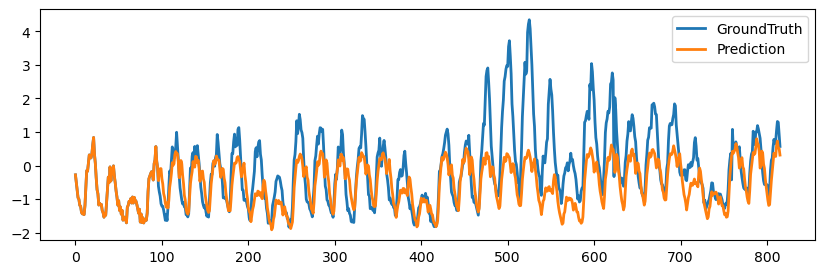

In [126]:
# # setting = "ECL_96_720_Informer_custom_ftS_sl96_ll48_pl720_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0"

# fix_seed = 2021
# random.seed(fix_seed)
# torch.manual_seed(fix_seed)
# np.random.seed(fix_seed)

# setting = "ECL_96_720_FEDformer_custom_ftM_sl96_ll48_pl720_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0"
# FEDformer_720_good, fedformer_dataloader_good = test(setting=setting, test=1)

## Exchange dataset

In [156]:
path = "/Users/angelavansprang/Documents/PhD/transformers for time series/Autoformer/dataset/exchange_rate/exchange_rate.csv"
df_raw = pd.read_csv(path)

df_raw

,date,0,1,2,3,4,5,6,OT
0,1990/1/1 0:00,0.785500,1.611000,0.861698,0.634196,0.211242,0.006838,0.525486,0.593000
1,1990/1/2 0:00,0.781800,1.610000,0.861104,0.633513,0.211242,0.006863,0.523972,0.594000
2,1990/1/3 0:00,0.786700,1.629300,0.861030,0.648508,0.211242,0.006975,0.526316,0.597300
3,1990/1/4 0:00,0.786000,1.637000,0.862069,0.650618,0.211242,0.006953,0.523834,0.597000
4,1990/1/5 0:00,0.784900,1.653000,0.861995,0.656254,0.211242,0.006940,0.527426,0.598500
...,...,...,...,...,...,...,...,...,...
7583,2010/10/6 0:00,0.718494,1.222195,0.737485,0.969974,0.143697,0.008500,0.688565,0.690846
7584,2010/10/7 0:00,0.721839,1.223459,0.741155,0.977297,0.143763,0.008595,0.690288,0.695701
7585,2010/10/8 0:00,0.723197,1.234111,0.745184,0.984446,0.143997,0.008562,0.691419,0.695943
7586,2010/10/9 0:00,0.720825,1.233905,0.744131,0.980344,0.143993,0.008555,0.690942,0.692689


Text(0.5, 0.98, 'Daily exchange rate of 8 different countries')

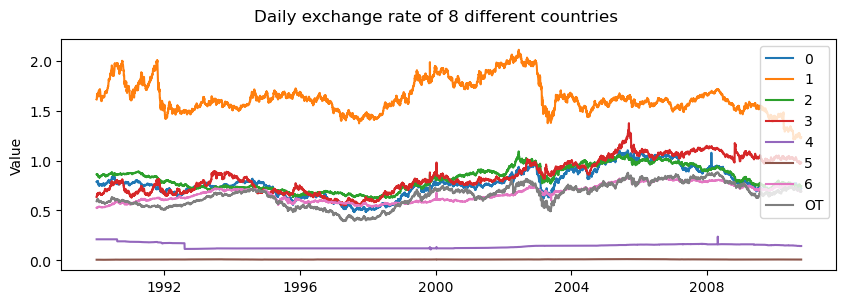

In [157]:
plt.plot(pd.to_datetime(df_raw['date'].values), df_raw["0"], label="0")
plt.plot(pd.to_datetime(df_raw['date'].values), df_raw["1"], label="1")
plt.plot(pd.to_datetime(df_raw['date'].values), df_raw["2"], label="2")
plt.plot(pd.to_datetime(df_raw['date'].values), df_raw["3"], label="3")
plt.plot(pd.to_datetime(df_raw['date'].values), df_raw["4"], label="4")
plt.plot(pd.to_datetime(df_raw['date'].values), df_raw["5"], label="5")
plt.plot(pd.to_datetime(df_raw['date'].values), df_raw["6"], label="6")
plt.plot(pd.to_datetime(df_raw['date'].values), df_raw["OT"], label="OT")
plt.rcParams["figure.figsize"] = (10,3)
plt.ylabel("Value")
plt.legend()
plt.suptitle("Daily exchange rate of 8 different countries")

Text(0.5, 0.98, 'Daily exchange rate of country 5')

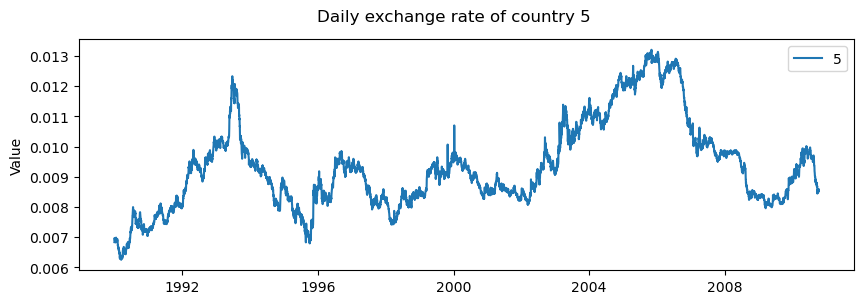

In [158]:
plt.plot(pd.to_datetime(df_raw['date'].values), df_raw["5"], label="5")
plt.rcParams["figure.figsize"] = (10,3)
plt.ylabel("Value")
plt.legend()
plt.suptitle("Daily exchange rate of country 5")

In [238]:
from data_provider.data_loader import Dataset_Custom
from torch.utils.data import DataLoader

def obtain_data_loader_exchange(pred_len, seq_len = 96, model="non-informer"): 
    label_len = 48

    # if model == "informer":
    #     features = "S"
    # else:
    #     features = "M"

    data_set_exchange = Dataset_Custom(
        root_path = "/Users/angelavansprang/Documents/PhD/transformers for time series/Autoformer/dataset/exchange_rate/",
        data_path = "exchange_rate.csv",
        flag="train",
        size=[seq_len, label_len, pred_len], # seq_len, label_len, pred_len
        features="M",
        target="OT", #default
        timeenc=1,
        freq="h"
    )

    data_loader_exchange = DataLoader(
        data_set_exchange,
        batch_size=1,
        shuffle=False,
        num_workers=0,
        drop_last=False
    )
    return data_loader_exchange

In [160]:
# obtain scaler for the data, as used by the dataloader

from sklearn.preprocessing import StandardScaler

seq_len = 96
set_type = 0 # {'train': 0, 'val': 1, 'test': 2}

border1s = [0, 12 * 30 * 24 - seq_len, 12 * 30 * 24 + 4 * 30 * 24 - seq_len]
border2s = [12 * 30 * 24, 12 * 30 * 24 + 4 * 30 * 24, 12 * 30 * 24 + 8 * 30 * 24]
border1 = border1s[set_type]
border2 = border2s[set_type]

cols_data = df_raw.columns[1:]
df_data = df_raw[cols_data]
train_data = df_data[border1s[0]:border2s[0]]
print(train_data.shape)

scaler = StandardScaler()
scaler.fit(train_data.values)
data = scaler.transform(df_data.values)

(7588, 8)


Text(0.5, 0.98, 'Daily exchange rate of 8 different countries')

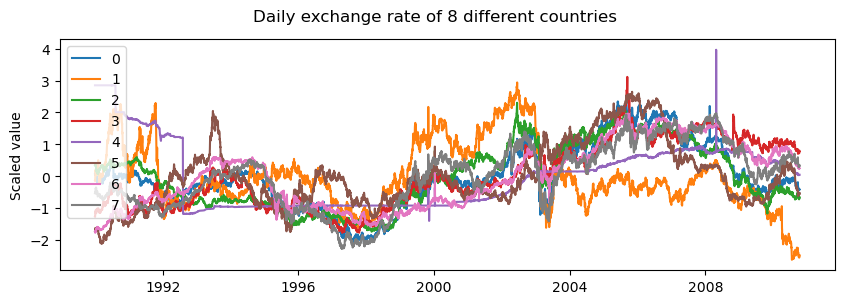

In [161]:
plt.plot(pd.to_datetime(df_raw['date'].values), data[:,0], label="0")
plt.plot(pd.to_datetime(df_raw['date'].values), data[:,1], label="1")
plt.plot(pd.to_datetime(df_raw['date'].values), data[:,2], label="2")
plt.plot(pd.to_datetime(df_raw['date'].values), data[:,3], label="3")
plt.plot(pd.to_datetime(df_raw['date'].values), data[:,4], label="4")
plt.plot(pd.to_datetime(df_raw['date'].values), data[:,5], label="5")
plt.plot(pd.to_datetime(df_raw['date'].values), data[:,6], label="6")
plt.plot(pd.to_datetime(df_raw['date'].values), data[:,7], label="7")
plt.rcParams["figure.figsize"] = (10,3)
plt.ylabel("Scaled value")
plt.legend()
plt.suptitle("Daily exchange rate of 8 different countries")

In [286]:
autoformer_96 = obtain_autoformer(pred_len=96, dataset="Exchange")
autoformer_192 = obtain_autoformer(pred_len=192, dataset="Exchange")
autoformer_336 = obtain_autoformer(pred_len=336, dataset="Exchange")
autoformer_720 = obtain_autoformer(pred_len=720, dataset="Exchange")

informer_96 = obtain_informer(pred_len=96, dataset="Exchange")
informer_192 = obtain_informer(pred_len=192, dataset="Exchange")
informer_336 = obtain_informer(pred_len=336, dataset="Exchange")
informer_720 = obtain_informer(pred_len=720, dataset="Exchange")

FEDformer_96 = obtain_FEDformer(pred_len=96, dataset="Exchange")
FEDformer_192 = obtain_FEDformer(pred_len=192, dataset="Exchange")
FEDformer_336 = obtain_FEDformer(pred_len=336, dataset="Exchange")
FEDformer_720 = obtain_FEDformer(pred_len=720, dataset="Exchange")

data_loader_exchange_96 = obtain_data_loader_exchange(pred_len=96)
data_loader_exchange_192 = obtain_data_loader_exchange(pred_len=192)
data_loader_exchange_336 = obtain_data_loader_exchange(pred_len=336)
data_loader_exchange_720 = obtain_data_loader_exchange(pred_len=720)

data_loader_exchange_96_informer = obtain_data_loader_exchange(pred_len=96, model="informer")
data_loader_exchange_192_informer = obtain_data_loader_exchange(pred_len=192, model="informer")
data_loader_exchange_336_informer = obtain_data_loader_exchange(pred_len=336, model="informer")
data_loader_exchange_720_informer = obtain_data_loader_exchange(pred_len=720, model="informer")

fourier enhanced block used!
modes=64, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
fourier enhanced block used!
modes=64, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]
 fourier enhanced cross attention used!
modes_q=64, index_q=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 71]
modes_kv=48, index_kv=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 

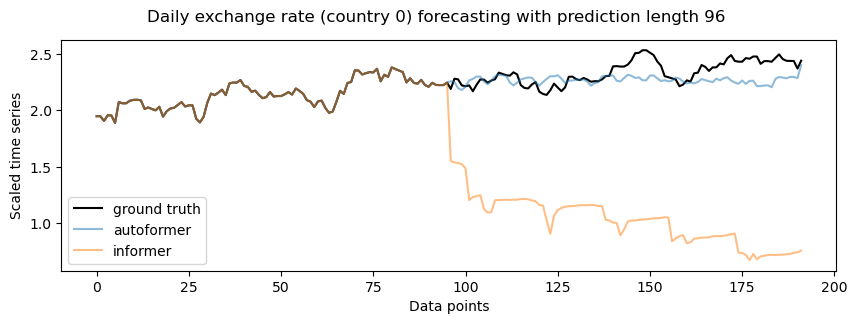

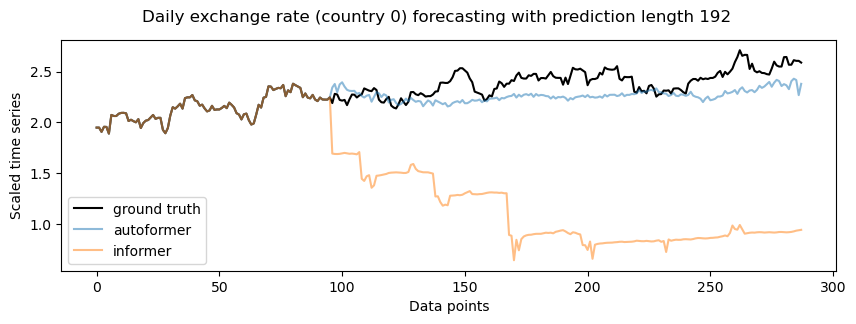

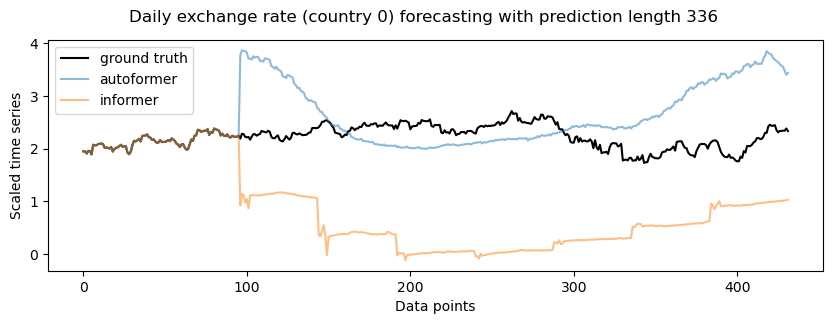

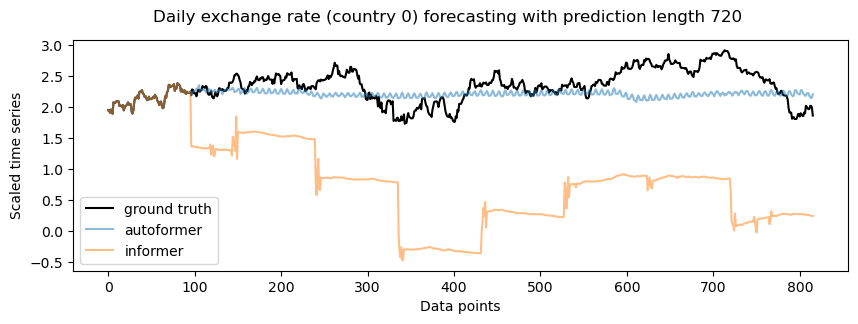

In [287]:
obtain_plot_predictions(pred_len=96, data_set="Exchange", data_loader_noninformers=data_loader_exchange_96, data_loader_informer=None, autoformer=autoformer_96, informer=informer_96, time_series_id=0)
obtain_plot_predictions(pred_len=192, data_set="Exchange", data_loader_noninformers=data_loader_exchange_192, data_loader_informer=None, autoformer=autoformer_192, informer=informer_192, time_series_id=0)
obtain_plot_predictions(pred_len=336, data_set="Exchange", data_loader_noninformers=data_loader_exchange_336, data_loader_informer=None, autoformer=autoformer_336, informer=informer_336, time_series_id=0)
obtain_plot_predictions(pred_len=720, data_set="Exchange", data_loader_noninformers=data_loader_exchange_720, data_loader_informer=None, autoformer=autoformer_720, informer=informer_720, time_series_id=0)

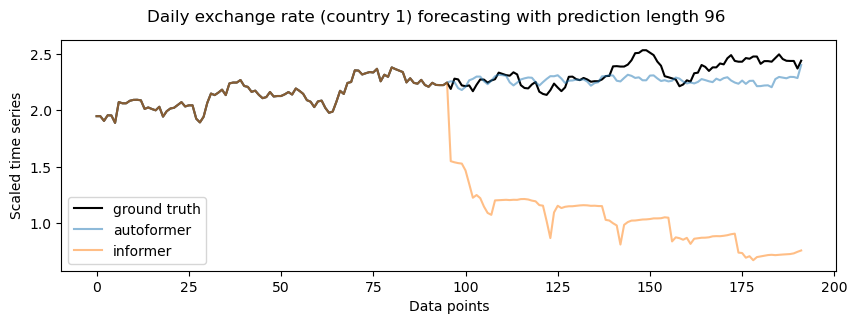

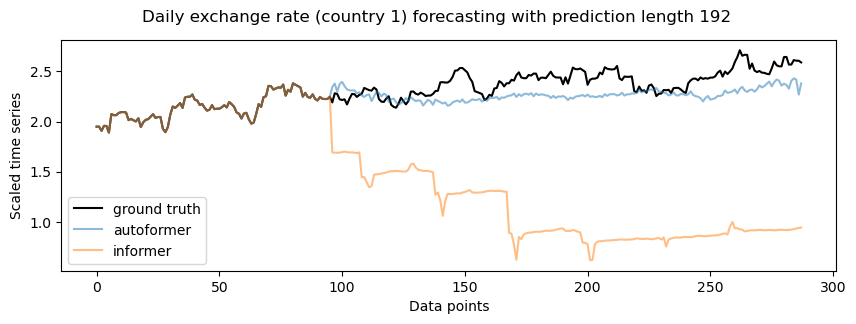

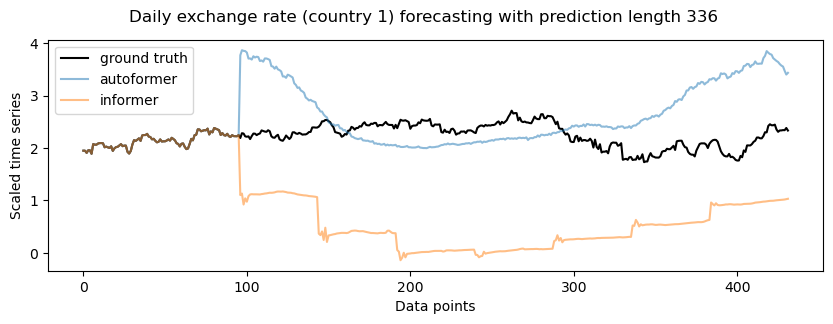

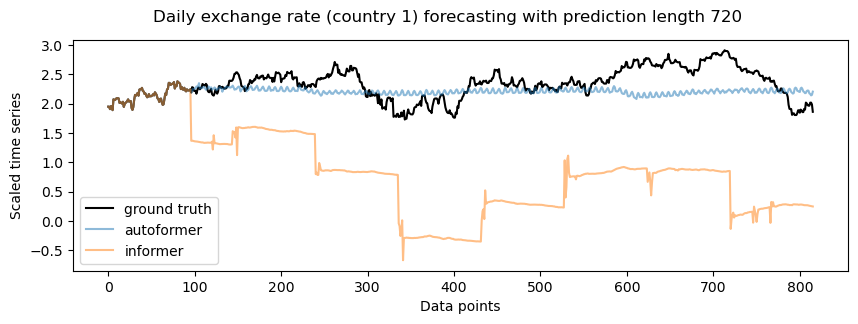

In [288]:
obtain_plot_predictions(pred_len=96, data_set="Exchange", data_loader_noninformers=data_loader_exchange_96, data_loader_informer=None, autoformer=autoformer_96, informer=informer_96, time_series_id=1)
obtain_plot_predictions(pred_len=192, data_set="Exchange", data_loader_noninformers=data_loader_exchange_192, data_loader_informer=None, autoformer=autoformer_192, informer=informer_192, time_series_id=1)
obtain_plot_predictions(pred_len=336, data_set="Exchange", data_loader_noninformers=data_loader_exchange_336, data_loader_informer=None, autoformer=autoformer_336, informer=informer_336, time_series_id=1)
obtain_plot_predictions(pred_len=720, data_set="Exchange", data_loader_noninformers=data_loader_exchange_720, data_loader_informer=None, autoformer=autoformer_720, informer=informer_720, time_series_id=1)

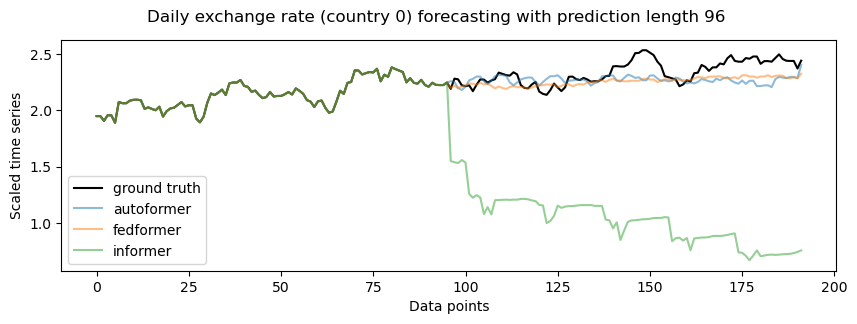

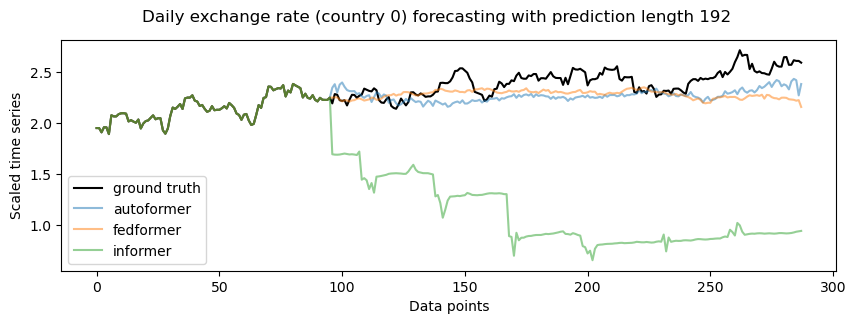

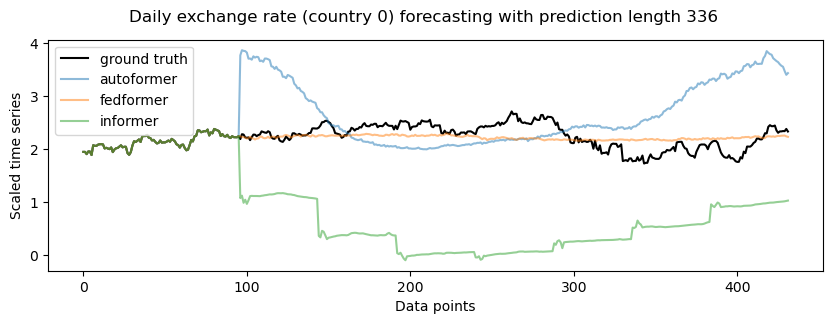

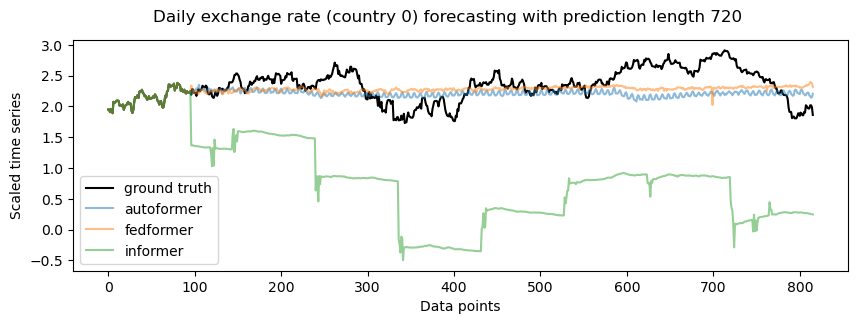

In [289]:
# obtain a plot with only the transformer models
obtain_plot_predictions(pred_len=96, data_set="Exchange", data_loader_noninformers=data_loader_exchange_96, data_loader_informer=None, autoformer=autoformer_96, informer=informer_96, fedformer=FEDformer_96)
obtain_plot_predictions(pred_len=192, data_set="Exchange", data_loader_noninformers=data_loader_exchange_192, data_loader_informer=None, autoformer=autoformer_192, informer=informer_192, fedformer=FEDformer_192)
obtain_plot_predictions(pred_len=336, data_set="Exchange", data_loader_noninformers=data_loader_exchange_336, data_loader_informer=None, autoformer=autoformer_336, informer=informer_336, fedformer=FEDformer_336)
obtain_plot_predictions(pred_len=720, data_set="Exchange", data_loader_noninformers=data_loader_exchange_720, data_loader_informer=None, autoformer=autoformer_720, informer=informer_720, fedformer=FEDformer_720)

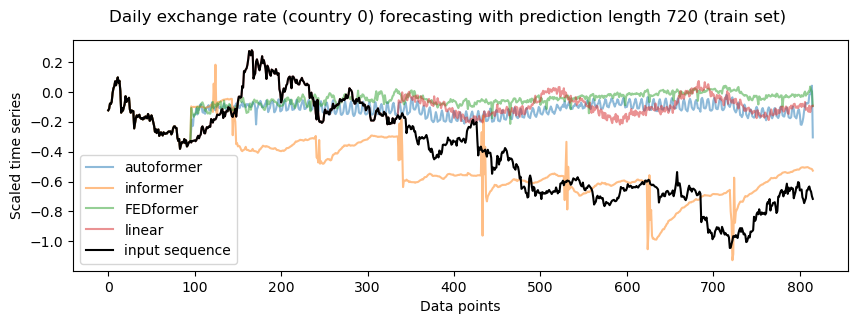

In [290]:
# Obtain a plot with a linear forecasting model
obtain_plot_predictions_v2(pred_len=720, data_set="Exchange", models=[autoformer_720, informer_720, FEDformer_720, linear_720], descriptions=["autoformer", "informer", "FEDformer", "linear"])

In [33]:
autoformer_720

Model(
  (decomp): series_decomp(
    (moving_avg): moving_avg(
      (avg): AvgPool1d(kernel_size=(25,), stride=(1,), padding=(0,))
    )
  )
  (enc_embedding): DataEmbedding_wo_pos(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(321, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=False)
    )
    (dropout): Dropout(p=0.05, inplace=False)
  )
  (dec_embedding): DataEmbedding_wo_pos(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(321, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=False)
    )
    (dropout): Dropout(p=0.05, inplace=False)
  )
  (encoder): En

In [34]:
FEDformer_720

Model(
  (decomp): series_decomp(
    (moving_avg): moving_avg(
      (avg): AvgPool1d(kernel_size=(25,), stride=(1,), padding=(0,))
    )
  )
  (enc_embedding): DataEmbedding_wo_pos(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(321, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=False)
    )
    (dropout): Dropout(p=0.05, inplace=False)
  )
  (dec_embedding): DataEmbedding_wo_pos(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(321, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=False)
    )
    (dropout): Dropout(p=0.05, inplace=False)
  )
  (encoder): En